# Datasets preprocessing

Filling missing values, normalization of data and label encoding

## Imports

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from scipy import stats

## Access to gDrive

In [28]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Wine red quality

### Read the dataset

In [0]:
wine_red = pd.read_csv('/content/gdrive/My Drive/ensemble/data/winequality-red.csv', sep=';')

### Preview of dataset

In [30]:
wine_red.head(n=3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


### Details of attributes in the dataset

In [6]:
wine_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Basic statistical parameters of the dataset

In [7]:
wine_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Visualization of the attributes of the dataset

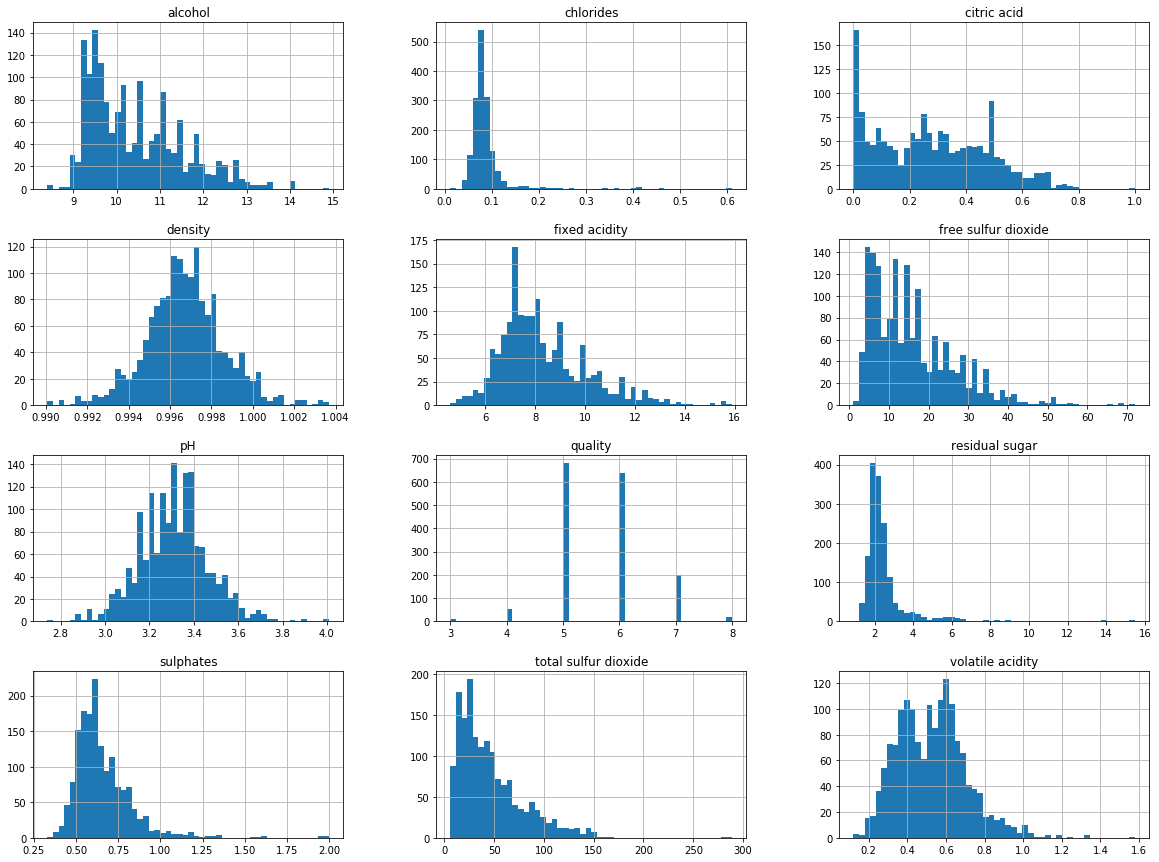

<Figure size 432x288 with 0 Axes>

In [8]:
wine_red.hist(bins=50, figsize=(20, 15))
# wine_red.hist(bins=50)

plt.show()
plt.savefig('/content/gdrive/My Drive/ensemble/charts/wine-red_histograms.jpg')

### Check normality of distribution of each income attribute

In [9]:
def is_normal_distribution(var, alpha):
    _, p = stats.normaltest(var)
    
    return not p < alpha

for column in wine_red.columns:
    print(f'column: {column}, normal distribution: {is_normal_distribution(wine_red[column], alpha=5e-3)}')

column: fixed acidity, normal distribution: False
column: volatile acidity, normal distribution: False
column: citric acid, normal distribution: False
column: residual sugar, normal distribution: False
column: chlorides, normal distribution: False
column: free sulfur dioxide, normal distribution: False
column: total sulfur dioxide, normal distribution: False
column: density, normal distribution: False
column: pH, normal distribution: False
column: sulphates, normal distribution: False
column: alcohol, normal distribution: False
column: quality, normal distribution: False


### Check impact of income on outcome attribute

#### Fixed acidity vs quality

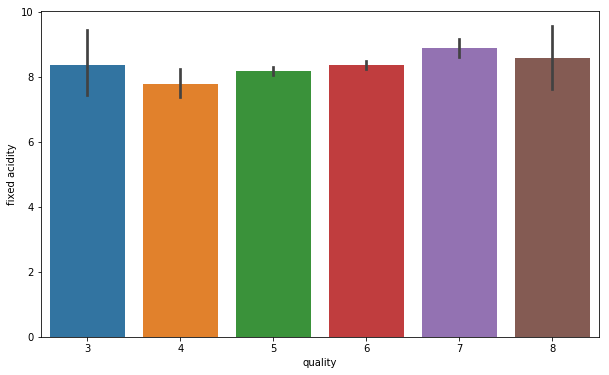

In [10]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='fixed acidity', data=wine_red)

There is no impact of fixed acidity on quality of wine

#### Volatile accidity vs quality

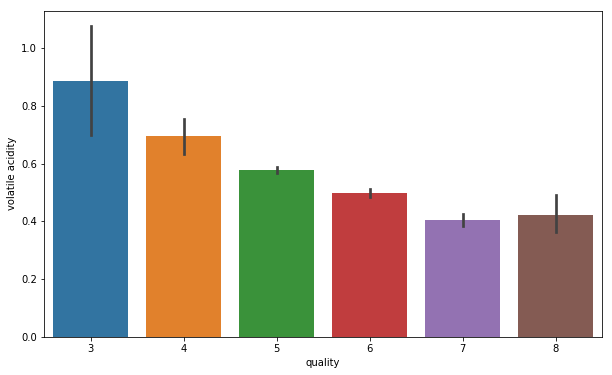

In [11]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='volatile acidity', data=wine_red)

Here is quite dependency: volatile acidity downs when quality grows up

#### Citric acid vs quality

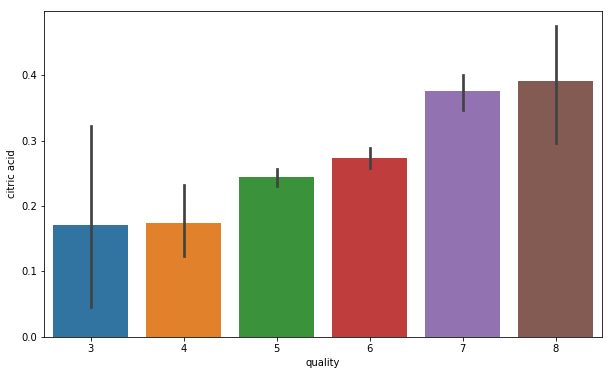

In [12]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='citric acid', data=wine_red)

Citric acid grows up while quality grows up

#### Residual sugar vs quality

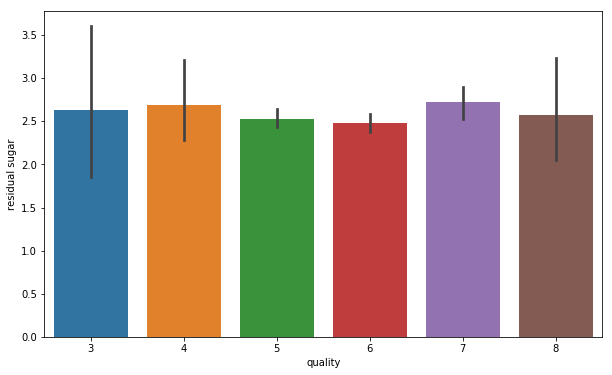

In [14]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='residual sugar', data=wine_red)

#### Chlorides vs quality

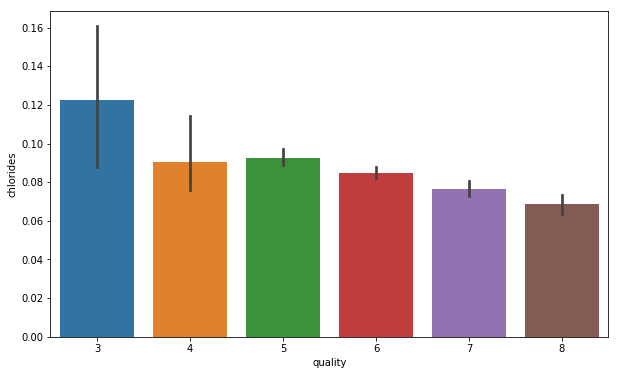

In [15]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='chlorides', data=wine_red)

Chlorides falls down while quality grows up

#### Free sulfur dixoxide vs quality

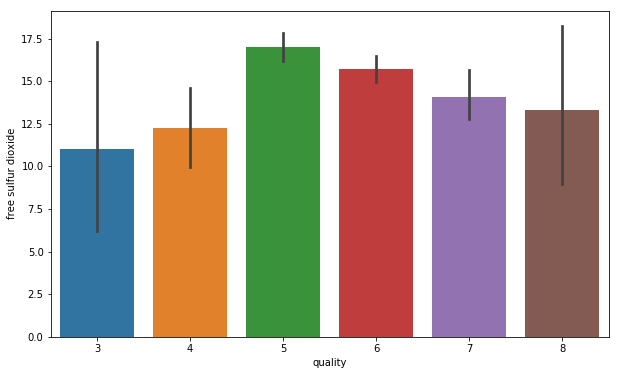

In [16]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='free sulfur dioxide', data=wine_red)

#### Total sulfur dixoxide vs quality

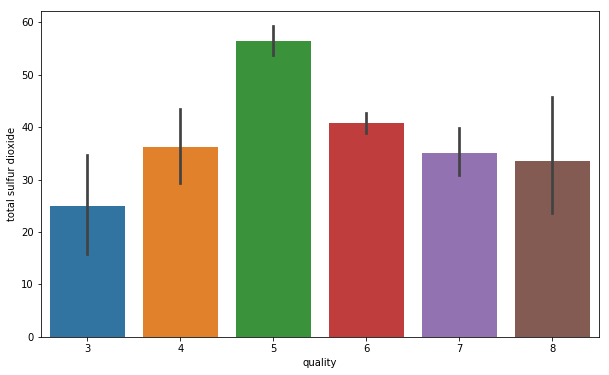

In [17]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='total sulfur dioxide', data=wine_red)

#### Sulphates vs quality

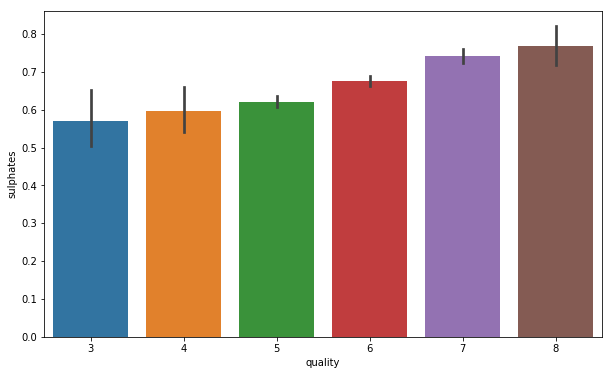

In [18]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='sulphates', data=wine_red)

It grows up while quality grows up

#### Alcohol vs quality

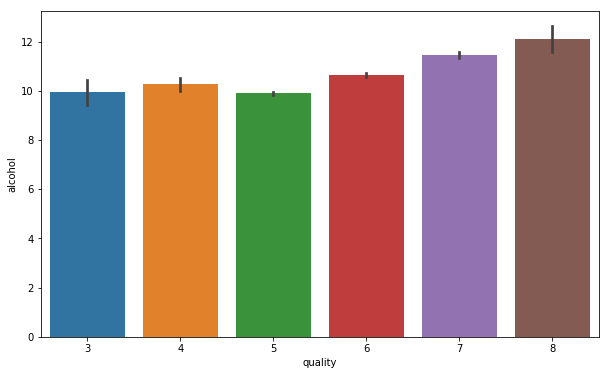

In [19]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='alcohol', data=wine_red)

Grows up while quality grows up

### Encode labels into 3 categories as preparing to 

In [0]:
bins = (2, 6, 8)
group_names = ['bad', 'good']
wine_red['quality'] = pd.cut(wine_red['quality'], bins=bins, labels=group_names)

In [0]:
label_quality = LabelEncoder()
wine_red['quality'] = label_quality.fit_transform(wine_red['quality'])

### Split the dataset into divided data and labels

In [0]:
x = wine_red.drop('quality', axis=1)
y = wine_red['quality']

### Split the dataset into train and test subsets with test size = 30%

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

### Scale data in the train subset

In [0]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)

### Save the subsets to files

In [0]:
# X_train
np.savetxt('/content/gdrive/My Drive/ensemble/data/red-0_3/x-train.csv', X_train, delimiter=',')

# y_train
np.savetxt('/content/gdrive/My Drive/ensemble/data/red-0_3/y-train.csv', y_train, delimiter=',')

# X_test
X_test.to_csv('/content/gdrive/My Drive/ensemble/data/red-0_3/x_test.csv', sep=',', index=False)

# y_test
np.savetxt('/content/gdrive/My Drive/ensemble/data/red-0_3/y-test.csv', y_test, delimiter=',')

### Split the dataset into train and test subsets with test size = 20% and save to files

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

# X_train
np.savetxt('/content/gdrive/My Drive/ensemble/data/red-0_2/x-train.csv', X_train, delimiter=',')

# y_train
np.savetxt('/content/gdrive/My Drive/ensemble/data/red-0_2/y-train.csv', y_train, delimiter=',')

# X_test
X_test.to_csv('/content/gdrive/My Drive/ensemble/data/red-0_2/x_test.csv', sep=',', index=False)

# y_test
np.savetxt('/content/gdrive/My Drive/ensemble/data/red-0_2/y-test.csv', y_test, delimiter=',')

### Split the dataset into train and test subsets with test size = 40% and save to files

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

# X_train
np.savetxt('/content/gdrive/My Drive/ensemble/data/red-0_4/x-train.csv', X_train, delimiter=',')

# y_train
np.savetxt('/content/gdrive/My Drive/ensemble/data/red-0_4/y-train.csv', y_train, delimiter=',')

# X_test
X_test.to_csv('/content/gdrive/My Drive/ensemble/data/red-0_4/x_test.csv', sep=',', index=False)

# y_test
np.savetxt('/content/gdrive/My Drive/ensemble/data/red-0_4/y-test.csv', y_test, delimiter=',')